In [ ]:
'''Autor: Caique Nascimento
Análise sobre incritos no ENEM:
    Terminaram Ensino Médio
    Não estão cursando ou não terminaram Ensino Médio

Dados disponibilizados pelo INEP:
    http://inep.gov.br/microdados'''

In [4]:
#Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Configuraçõs iniciais
%matplotlib inline
low_memory=False

In [6]:
#Variáveis
#Como havia muitos arquivos com colunas e delimitadores
#diferentes, optei por analisar cada arquivo separadamente
f1 = 'MICRODADOS_ENEM_2014.csv'
f2 = 'MICRODADOS_ENEM_2015.csv'
f3 = 'MICRODADOS_ENEM_2016.csv'
f4 = 'MICRODADOS_ENEM_2017.csv'
f5 = 'MICRODADOS_ENEM_2018.csv'
anos = ['2014', '2015', '2016', '2017', '2018']
insc = []
naoter = []
term = []

In [7]:
#Analisando as colunas dos arquivos
df = pd.read_csv(f1, usecols=['ST_CONCLUSAO', 'NU_INSCRICAO'], encoding='iso-8859-1', sep=',')
naoter.append(df.query('(ST_CONCLUSAO == 4)')['ST_CONCLUSAO'].count())
term.append(df.query('(ST_CONCLUSAO == 1)')['ST_CONCLUSAO'].count())
insc.append(len(df['NU_INSCRICAO']))

df = pd.read_csv(f2, usecols=['TP_ST_CONCLUSAO', 'NU_INSCRICAO'], encoding='iso-8859-1', sep=',')
naoter.append(df.query('(TP_ST_CONCLUSAO == 4 )')['TP_ST_CONCLUSAO'].count())
term.append(df.query('(TP_ST_CONCLUSAO == 1)')['TP_ST_CONCLUSAO'].count())
insc.append(len(df['NU_INSCRICAO']))

df = pd.read_csv(f3, usecols=['TP_ST_CONCLUSAO', 'NU_INSCRICAO'], encoding='iso-8859-1', sep=';')
naoter.append(df.query('(TP_ST_CONCLUSAO == 4)')['TP_ST_CONCLUSAO'].count())
term.append(df.query('(TP_ST_CONCLUSAO == 1)')['TP_ST_CONCLUSAO'].count())
insc.append(len(df['NU_INSCRICAO']))

df = pd.read_csv(f4, usecols=['TP_ST_CONCLUSAO', 'NU_INSCRICAO'], encoding='iso-8859-1', sep=';')
naoter.append(df.query('(TP_ST_CONCLUSAO == 4)')['TP_ST_CONCLUSAO'].count())
term.append(df.query('(TP_ST_CONCLUSAO == 1)')['TP_ST_CONCLUSAO'].count())
insc.append(len(df['NU_INSCRICAO']))

df = pd.read_csv(f5, usecols=['TP_ST_CONCLUSAO', 'NU_INSCRICAO'], encoding='iso-8859-1', sep=';')
naoter.append(df.query('(TP_ST_CONCLUSAO == 4)')['TP_ST_CONCLUSAO'].count())
term.append(df.query('(TP_ST_CONCLUSAO == 1)')['TP_ST_CONCLUSAO'].count())
insc.append(len(df['NU_INSCRICAO']))

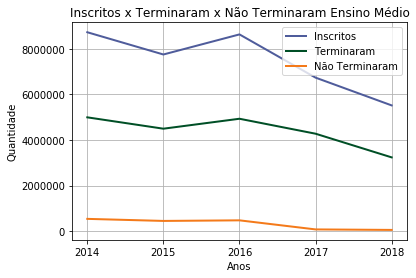

In [8]:
#Plotar no gráfico
#Utilizei alguns modelos de gráficos para que os dados pudessem ser visto de várias formas
fig, ax = plt.subplots()
ax.plot(anos, insc, lw = 2, color = '#4F5C9B', alpha = 1, label = 'Inscritos' )
ax.plot(anos, term, lw = 2, color = '#004F26', alpha = 1, label = 'Terminaram' )
ax.plot(anos, naoter, lw = 2, color = '#F47A1A', alpha = 1, label = 'Não Terminaram')
ax.grid()
plt.legend()
ax.set_title('Inscritos x Terminaram x Não Terminaram Ensino Médio')
ax.set_xlabel('Anos')
ax.set_ylabel('Quantidade')
plt.show()

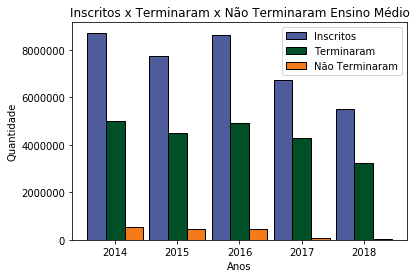

In [9]:
#Outra plotagem

barWidth = 0.3
bars1 = insc
bars2 = term
bars3 = naoter
yer1 = [2014, 2015, 2016, 2017, 2018]
yer2 = [2014, 2015, 2016, 2017, 2018]
yer3 = [2014, 2015, 2016, 2017, 2018]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, width = barWidth, color = '#4F5C9B', edgecolor = 'black', yerr=yer1, capsize=7, label='Inscritos')
plt.bar(r2, bars2, width = barWidth, color = '#004F26', edgecolor = 'black', yerr=yer2, capsize=7, label='Terminaram')
plt.bar(r3, bars3, width = barWidth, color = '#F47A1A', edgecolor = 'black', yerr=yer3, capsize=7, label='Não Terminaram')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['2014', '2015', '2016', '2017', '2018'])
plt.title('Inscritos x Terminaram x Não Terminaram Ensino Médio')
plt.ylabel('Quantidade')
plt.xlabel('Anos')
plt.legend()
plt.show()


In [ ]:
#Outra plotagem

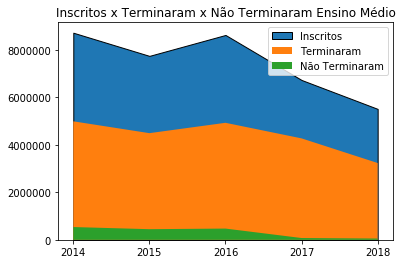

In [12]:
x=anos
y= insc

plt.stackplot(x,y, labels=['Inscritos'], edgecolor = 'black')
plt.stackplot(x, term, labels=['Terminaram'])
plt.stackplot(x, naoter, labels=['Não Terminaram'])
plt.legend(loc='upper right')
plt.title('Inscritos x Terminaram x Não Terminaram Ensino Médio')
plt.show()

In [11]:
#Dados mostrados em uma tabela
dadostb = {}
for x in range(5):    
    dadostb.update({anos[x]: [insc[x], term[x], naoter[x]]})
dfdt = pd.DataFrame(dadostb, columns=anos, index=['Inscritos', 'Terminaram', 'Não Terminaram'])
dfdt

,2014,2015,2016,2017,2018
Inscritos,8722248,7746427,8627367,6731341,5513747
Terminaram,4990184,4492044,4928251,4272215,3233968
Não Terminaram,537273,446963,472753,74730,52741
